In [ ]:
# REGRESSÃO LINEAR

In [ ]:
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #plotting library
import statsmodels.api as sm #statistical models and tests

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.ExcelFile ('/content/drive/My Drive/data/EFC.xlsx')

In [ ]:
data.sheet_names

['2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2011-2022']

In [ ]:
grimes = pd.read_excel(data, '2011-2022')

In [ ]:
pd.set_option ('display.max_rows', 12)

In [ ]:
grimes

,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 4,Destino,Unnamed: 6,TU,TKU
0,NaN,NaN,NaN,Estação,UF,Estação,UF,NaN,NaN
1,01/2011,EFC,Cobre,Paraupebas,PA,Ponta da Madeira Cobre,MA,29116.0,25185340.0
2,01/2011,EFC,Ferro Gusa,Açailândia,MA,Ponta da Madeira Pêra do Píer,MA,113440.0,58661920.0
3,01/2011,EFC,Ferro Gusa,Marabá,PA,Ponta da Madeira Pêra do Píer,MA,46600.0,34530600.0
4,01/2011,EFC,Ferro Gusa,Rosário,MA,Ponta da Madeira Pêra do Píer,MA,12872.0,553496.0
...,...,...,...,...,...,...,...,...,...
92851,12/2022,RMS,Soja,Cruz Alta,RS,Rio Grande,RS,6914.0,5102129.0
92852,12/2022,RMS,Soja,Maringa,PR,D Pedro II,PR,3117.0,2031526.0
92853,12/2022,RMS,Soja,Maringa,PR,São Francisco do Sul,SC,1089.0,825928.0
92854,12/2022,RMS,Soja,Tupancireta,RS,Rio Grande,RS,1010.0,689754.0


In [ ]:
## SEPARAÇÃO
grouped = grimes.groupby(['Ferrovia', 'Origem'])
EFCC = grouped.get_group( ('EFC', 'Carajás') )

In [ ]:
EFCC

,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 4,Destino,Unnamed: 6,TU,TKU
8,01/2011,EFC,Manganês,Carajás,PA,Virador de Vagões Minério,MA,121270.0,1.081728e+08
10,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112.0,4.931245e+07
11,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684.0,1.858534e+07
12,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010.0,1.280353e+07
13,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432.0,8.031953e+09
...,...,...,...,...,...,...,...,...,...
91544,11/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,23009.0,3.520377e+06
91545,11/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,7406553.0,6.599239e+09
92206,12/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,202155.0,7.641459e+07
92207,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461.0,5.119533e+06


In [ ]:
EFCC.to_excel('/content/drive/My Drive/data/EFCC.xlsx')

In [ ]:
EFCC

,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 4,Destino,Unnamed: 6,TU,TKU
8,01/2011,EFC,Manganês,Carajás,PA,Virador de Vagões Minério,MA,121270.0,1.081728e+08
10,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112.0,4.931245e+07
11,01/2011,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,120684.0,1.858534e+07
12,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010.0,1.280353e+07
13,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432.0,8.031953e+09
...,...,...,...,...,...,...,...,...,...
91544,11/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,23009.0,3.520377e+06
91545,11/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,7406553.0,6.599239e+09
92206,12/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,202155.0,7.641459e+07
92207,12/2022,EFC,Minério de Ferro,Carajás,PA,Marabá,PA,33461.0,5.119533e+06


In [ ]:
grouped = EFCC.groupby(['Mercadoria ANTT', 'Origem', 'Unnamed: 6', 'TKU'] ).sum()

<ipython-input-22-32066daa683c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = EFCC.groupby(['Mercadoria ANTT', 'Origem', 'Unnamed: 6', 'TKU'] ).sum()


In [ ]:
grouped

TU
Mercadoria ANTT  Origem  Unnamed: 6 TKU                 
Manganês         Carajás MA         5019003.0     5633.0
                                    18717180.0   20820.0
                                    20343471.0   22629.0
                                    27104220.0   30420.0
                                    27274401.0   30611.0
...                                                  ...
Minério de Ferro Carajás PA         16701916.0  108454.0
                                    17203494.0  111711.0
                                    18585336.0  120684.0
                                    19776680.0  128420.0
                                    20294736.0  131784.0

[609 rows x 1 columns]

In [ ]:
grouped = EFCC.groupby( ['Mercadoria ANTT', 'Unnamed: 6'] )
dados = grouped.get_group( ('Minério de Ferro', 'MA') )

In [ ]:
dados

,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 4,Destino,Unnamed: 6,TU,TKU
10,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112.0,4.931245e+07
12,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010.0,1.280353e+07
13,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432.0,8.031953e+09
747,02/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,131833.0,4.996471e+07
749,02/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,21969.0,1.873956e+07
...,...,...,...,...,...,...,...,...,...
90870,10/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,9511719.0,8.474942e+09
91543,11/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,196961.0,7.445126e+07
91545,11/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,7406553.0,6.599239e+09
92206,12/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,202155.0,7.641459e+07


In [ ]:
dados.to_excel('/content/drive/My Drive/data/dadosEFCC.xlsx')

In [ ]:
## Dados do PIB (R$Milhões)
grimes1 = pd.ExcelFile('/content/drive/My Drive/data/dadosEFCC.xlsx')
PEFCC = pd.read_excel(grimes1)
grimes2 = pd.ExcelFile('/content/drive/My Drive/data/PIB IPEA.xlsx')
PIB= pd.read_excel(grimes2)

In [ ]:
## Mesclando dados
PEFCC_PIB = pd.concat([PEFCC,PIB], axis=1)

In [ ]:
PEFCC_PIB

,Unnamed: 0,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 4,Destino,Unnamed: 6,TU,TKU,Data,PIB (R$ Milhões)
0,10,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112,49312448,2011.01,333255.6
1,12,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010,12803530,2011.02,334982.0
2,13,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432,8031953344,2011.03,347879.6
3,747,02/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,131833,49964707,2011.04,349049.3
4,749,02/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,21969,18739557,2011.05,366256.2
...,...,...,...,...,...,...,...,...,...,...,...,...
353,90870,10/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,9511719,8474941629,NaN,NaN
354,91543,11/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,196961,74451258,NaN,NaN
355,91545,11/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,7406553,6599238723,NaN,NaN
356,92206,12/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,202155,76414590,NaN,NaN


In [ ]:
PEFCC_PIB.to_excel('/content/drive/My Drive/data/PEFCC_PIB.xlsx')

In [ ]:
data6 = pd.ExcelFile('/content/drive/My Drive/data/PEFCC_PIB.xlsx')
oblivion = pd.read_excel(data6,index_col=[0])

In [ ]:
oblivion

,Unnamed: 0,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 4,Destino,Unnamed: 6,TU,TKU,Data,PIB (R$ Milhões)
0,10,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112,49312448,2011.01,333255.6
1,12,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010,12803530,2011.02,334982.0
2,13,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432,8031953344,2011.03,347879.6
3,747,02/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,131833,49964707,2011.04,349049.3
4,749,02/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,21969,18739557,2011.05,366256.2
...,...,...,...,...,...,...,...,...,...,...,...,...
353,90870,10/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,9511719,8474941629,NaN,NaN
354,91543,11/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,196961,74451258,NaN,NaN
355,91545,11/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,7406553,6599238723,NaN,NaN
356,92206,12/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,202155,76414590,NaN,NaN


In [ ]:
oblivion.drop( ['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
oblivion

,Mês/Ano,Ferrovia,Mercadoria ANTT,Origem,Unnamed: 4,Destino,Unnamed: 6,TU,TKU,Data,PIB (R$ Milhões)
0,01/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,130112,49312448,2011.01,333255.6
1,01/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,15010,12803530,2011.02,334982.0
2,01/2011,EFC,Minério de Ferro,Carajás,PA,Virador de Vagões Minério,MA,9004432,8031953344,2011.03,347879.6
3,02/2011,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,131833,49964707,2011.04,349049.3
4,02/2011,EFC,Minério de Ferro,Carajás,PA,Rosário,MA,21969,18739557,2011.05,366256.2
...,...,...,...,...,...,...,...,...,...,...,...
353,10/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,9511719,8474941629,NaN,NaN
354,11/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,196961,74451258,NaN,NaN
355,11/2022,EFC,Minério de Ferro,Carajás,PA,Ponta da Madeira,MA,7406553,6599238723,NaN,NaN
356,12/2022,EFC,Minério de Ferro,Carajás,PA,Açailândia,MA,202155,76414590,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

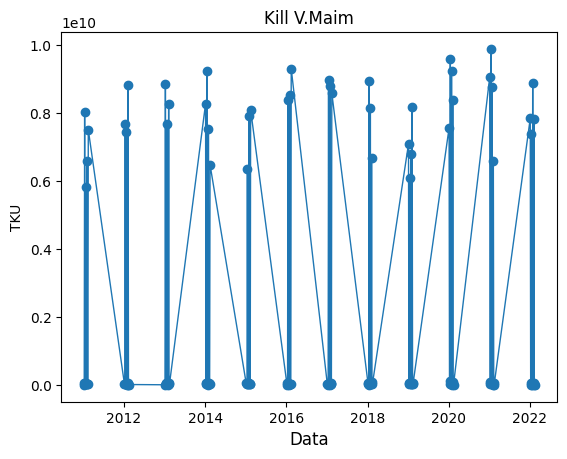

In [ ]:
plt.plot(oblivion['Data'], oblivion['TKU'], linewidth='1', linestyle='-', marker='o')
plt.title('Kill V.Maim')
plt.xlabel('Data', fontsize=12)
plt.ylabel('TKU', fontsize=10)
plt.rc('axes', titlesize=3)
plt.show

In [ ]:
## Analíse estatística
pd.set_option('display.float_format', lambda x:'%.2f' % x)
oblivion.describe()

,TU,TKU,Data,PIB (R$ Milhões)
count,358.00,358.00,144.00,144.00
mean,3998814.35,3543307883.64,2016.56,550057.90
std,4889972.55,4394565639.48,3.46,130564.39
min,2680.00,1819720.00,2011.01,333255.60
25%,91523.00,34595694.00,2013.79,459746.65
50%,182842.50,69114465.00,2016.57,530926.65
75%,9207440.50,8228954969.75,2019.34,616202.03
max,13858719.00,12348118629.00,2022.12,873219.80


In [ ]:
## Correlação Linear
oblivion.corr(method = 'pearson')

<ipython-input-39-434bae2c0e7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  oblivion.corr(method = 'pearson')


,TU,TKU,Data,PIB (R$ Milhões)
TU,1.00,1.00,0.05,0.05
TKU,1.00,1.00,0.05,0.05
Data,0.05,0.05,1.00,0.95
PIB (R$ Milhões),0.05,0.05,0.95,1.00


In [ ]:
## Variáveis y,x e constante regressão
y = oblivion ['TKU']
xn = oblivion ['PIB (R$ Milhões)']
x = sm.add_constant(xn)

In [ ]:
## Estimando a Regressão Linear
regression = sm.OLS(y,x)
results = regression.fit()

MissingDataError: ignored